# Vehicle Price Prediction

In [133]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression

# Data Extraction 

In [134]:
vehicle = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [135]:
vehicle.shape

(4340, 8)

In [136]:
vehicle.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [137]:
vehicle.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [138]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


## Selection Data 

In [139]:
df = vehicle[['year', 'selling_price']]
df.head()

year  selling_price
0  2007          60000
1  2007         135000
2  2012         600000
3  2017         250000
4  2014         450000

## Linear Regression Model 

In [140]:
#split data
X = df['year'].values.reshape(-1,1)
y = df['selling_price'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3472, 1)
(3472, 1)
(868, 1)
(868, 1)


In [141]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [142]:
#accuracy score
lr.score(X_test, y_test)

0.20919647590397483

Text(0.5, 1.0, 'Year ~ Selling Price')

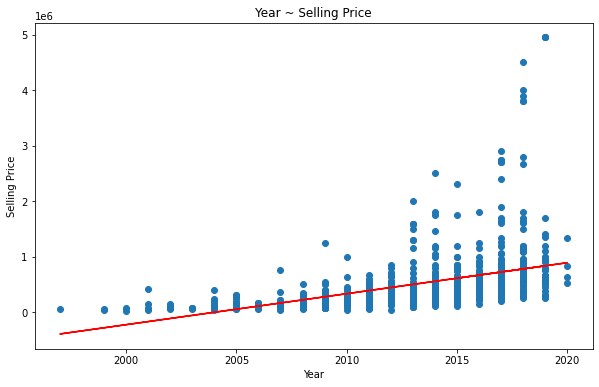

In [143]:
#prediction
pred = lr.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, pred, c='r')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year ~ Selling Price')

In [144]:
#test prediction selling price on 2022
lr.predict([[2022]])

array([[1001784.56915824]])

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


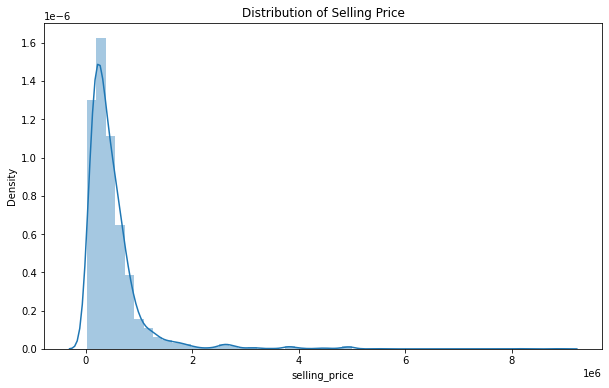

In [145]:
#distribution 
plt.figure(figsize=(10,6))
sns.distplot(df.selling_price)
plt.title("Distribution of Selling Price")
plt.show()

year  selling_price
year           1.000000       0.413922
selling_price  0.413922       1.000000

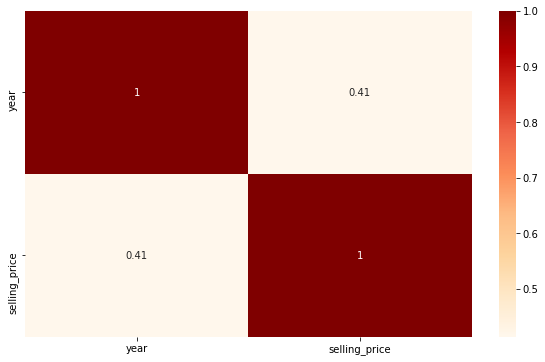

In [146]:
#correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='OrRd')
df.corr()

<AxesSubplot:xlabel='year', ylabel='selling_price'>

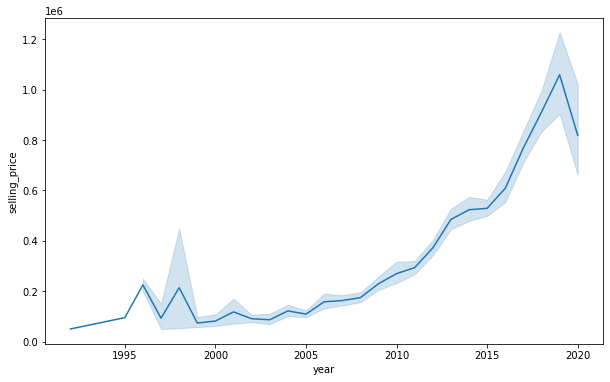

In [147]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='year', y='selling_price')